# Austin Crime Report Data
## by Matt Walker

## Investigation Overview

My goal is to discover which crimes are the most popularly reported and how they have progressed since 2003. I do this by comparing the amount and category of crime by the year and month.

## Dataset Overview

This dataset is a record of incidents which the Austin Police Department responded to and wrote a report for. Please note that this dataset only shows the highest level offense, though it may have several offenses associated with it.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import datetime as dt

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('Crime_Reports_Full.csv')

In [3]:
top_crimes = df['Highest Offense Description'].value_counts() #Making a variable for the value counts of crimes
top_crimes_5 = top_crimes[0:5] #Limiting the variable to the top 5
locate = df['Location Type'].value_counts()
top_locate = locate[:10]

In [5]:
df['Occurred Date'] = pd.to_datetime(df['Occurred Date'])
df['Year'] = df['Occurred Date'].dt.year
df['Month'] = df['Occurred Date'].dt.month
df['Day'] = df['Occurred Date'].dt.day

In [6]:
# Getting the value counts for the months and changing it to the abbreviated name
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [7]:
# Save the index for the top 5 crimes
top_5 = top_crimes_5.index
# Making a dataset of only the top 5 crimes
df_top_5 = df[df['Highest Offense Description'].isin(top_5)]
# Reseting the index
df_top_5 = df_top_5.reset_index(drop = True)
# Creating a new column where each row is = 1
df_top_5['Count'] = 1
# Filling in the blanks for the Family Violence column
df_top_5['Family Violence'] = df_top_5['Family Violence'].astype(str).fillna('')
# Grouping by the Year and the Highest Offense Description columns, getting the count, and reseting the index
df_top_5_grpd = df_top_5.groupby(['Year', 'Highest Offense Description']).count().reset_index()

In [8]:
# Save the index for the top 5 crimes
top_location = top_locate.index
# Making a dataset of only the top 5 crimes
df_locate = df[df['Location Type'].isin(top_location)]
# Reseting the index
df_locate = df_locate.reset_index(drop = True)
# Creating a new column where each row is = 1
df_locate['Count'] = 1
# Filling in the blanks for the Family Violence column
df_locate['Family Di'] = df_locate['Location Type'].astype(str).fillna('')
# Grouping by the Year and the Highest Offense Description columns, getting the count, and reseting the index
df_location = df_locate.groupby(['Year', 'Month', 'Day', 'Location Type']).count().reset_index()

In [9]:
# Grouping like last time but adding the month column
df_top_5_grpd_ym = df_top_5.groupby(['Year', 'Month', 'Highest Offense Description']).count().reset_index()

In [10]:
# Making a new dataset with only thee columns needed
df_final = df_top_5_grpd_ym[['Month', 'Year', 'Count', 'Highest Offense Description']]
# Regrouping again and tarnsforming
idx = df_final.groupby(['Year', 'Month'])['Count'].transform(max) == df_final['Count']
# Resetting the index
df_final = df_final[idx].reset_index(drop=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Top 5 Crimes Reported in Austin, TX

Theft (including burglary) are 3 out of the 5 top crimes. Burglary of Residence received 74,115 reports while Burglary of Vehicle had 215,485. That means a person is almost 3 times more likely to have their car broken into compared to their house.

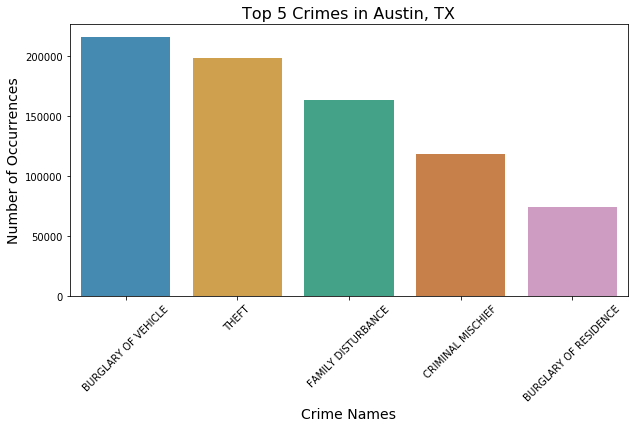

In [11]:
sb.set_palette('colorblind') # Making the color scheme set up for colorblind people
plt.figure(figsize = (10,5)) # Making the figure size 10x5
sb.barplot(top_crimes_5.index, top_crimes_5.values, alpha = 0.8) # Making a bar plot with the crime names on bottom and 
# the counts on the left. Also set them to be a bit softer color so not to cause eye strain
plt.title('Top 5 Crimes in Austin, TX', fontsize = 16) # The title and font size
plt.ylabel('Number of Occurrences', fontsize = 14) #y-axis label and font size
plt.xlabel('Crime Names', fontsize = 14) # x-axis label and font size
plt.xticks(rotation = 45) #Change the direction of the x ticks
plt.show();

## Austin Crime Over the Years

Starting in 2003, the yearly total report count was 153,567. As of 2018 the report count has dropped down to 102,100. That's a 31.5% decrease, or almost a third less crime. The overall downward trend lines show that well, with few exceptions. The peak of crime was between 2008 and 2010. This could be attributed to the economic recession at that time.

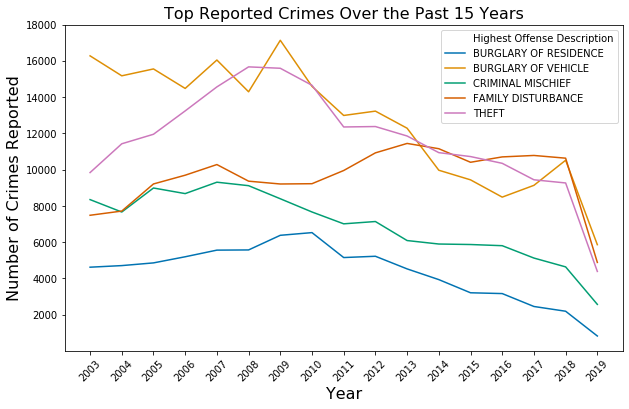

In [12]:
x_ticks = np.arange(2003, 2020, 1) # Setting the min to 2003, the max to 2020, and stepping by each year for ticks
y_ticks = np.arange(2000, 19000, 2000) # Setting the min to 2000, the max to 19000, and stepping by 2000 each tick
plt.figure(figsize = (10,6)) # Making the plot 10x6
sb.lineplot(x='Year', y= 'Count', hue='Highest Offense Description', data=df_top_5_grpd, color='colorblind');
# Making a plot where the x axis is the Year, the y axis is the count, and the lines are the Highest Offense Description
plt.xticks(x_ticks, rotation = 45) # Rotating the ticks for easier viewing
plt.ylabel('Number of Crimes Reported', fontsize=16) # Setting y label and font size
plt.yticks(y_ticks) # Making the y ticks
plt.xlabel('Year', fontsize = 16) # Setting x label and font size
plt.title('Top Reported Crimes Over the Past 15 Years', fontsize=16) # Making title and font size
plt.legend(); # Adding the legend

## Monthly and Yearly Breakdown of Austin Crimes

February is the month with the least amount of crimes reported. Crimes tend to occur in the summer months between May and October. During those 5 months there is a 20% increase in crime compared to February. The highest crime period was in March 2009 with 1,726 reports of crime while the lowest was in February 2015 with 758 reports. All things considered, a 60% increase in crime 6 years apart isn't that terrible.

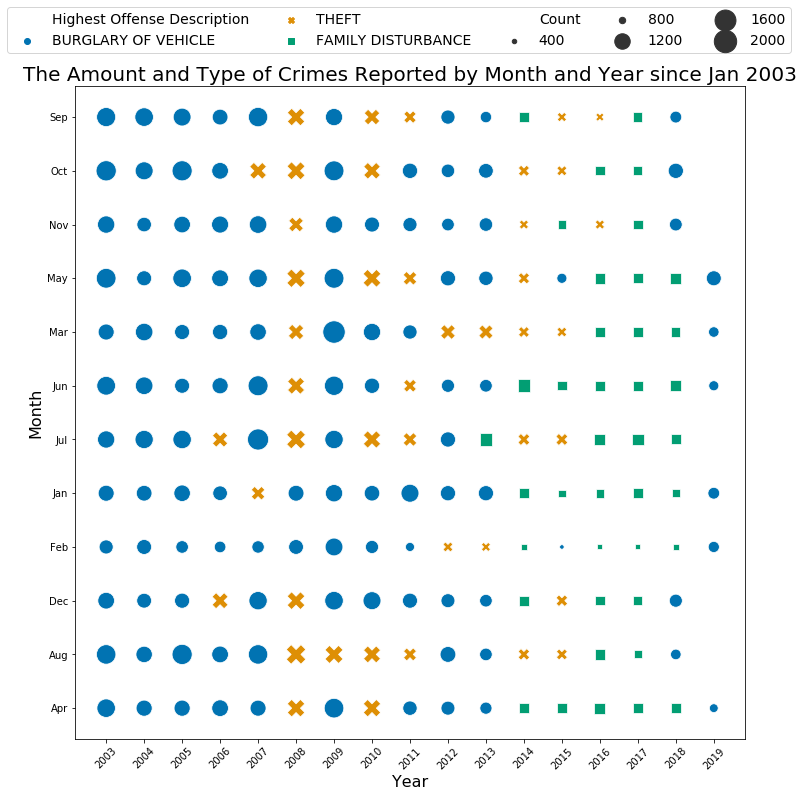

In [13]:
x_ticks=np.arange(2003, 2020, 1) # Making the min x tick to 2003, the max to 2020, and each step being a year
plt.figure(figsize= (12,12)) # Making the figure size 10x10
ax = sb.scatterplot(data = df_final, x = 'Year', y='Month', hue= 'Highest Offense Description',
               style='Highest Offense Description', size='Count', sizes= (20, 500))
# Making a scatter plot with x being the Year column, y is the Month column, the hue and style are the Highest Offense 
# Description column, and making the size of the points dependant on the count size
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0., ncol=2) # Moving the legend outside of the plot
plt.title('The Amount and Type of Crimes Reported by Month and Year since Jan 2003', fontsize=20) # Making the title and font size
plt.xticks(x_ticks, rotation=45) # Rotating the years for easier viewing 
plt.xlabel('Year', fontsize=16) # Making the x label and font size
plt.ylabel('Month', fontsize=16) # Making the x label and font size
ax.legend(ncol=5, loc='upper center', fontsize = 14, bbox_to_anchor=(0.5, .98), bbox_transform=plt.gcf().transFigure); # Making a custom legend